In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import important libraries

In [2]:
!pip install dill

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 2.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dill
import warnings
from scipy.stats import norm
import pickle

# Read preprocessed train data

In [4]:
X_train_not_churned = pd.read_parquet('/content/drive/MyDrive/Churn Prediction/X_train_not_churned')
y_train_not_churned = pd.read_parquet('/content/drive/MyDrive/Churn Prediction/y_train_not_churned')['target_actual_profit']

# Read preprocessed test data

In [5]:
X_test_not_churned = pd.read_parquet('/content/drive/MyDrive/Churn Prediction/X_test_not_churned')
y_test_not_churned = pd.read_parquet('/content/drive/MyDrive/Churn Prediction/y_test_not_churned')['target_actual_profit']

# Create regression evaluation class

In [6]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [7]:
class RegressionEvaluation:
    def __init__(self, y_test, y_pred):
        self.y_test = y_test
        self.y_pred = y_pred

    def r2(self):
        return r2_score(self.y_test, self.y_pred)

    def mean_absolute_error(self):
        return mean_absolute_error(self.y_test, self.y_pred)

    def mean_squared_error(self):
        return mean_squared_error(self.y_test, self.y_pred)

    def root_mean_squared_error(self):
        return np.sqrt(self.mean_squared_error())

    def residuals_plot(self):
        residuals = self.y_test - self.y_pred
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=self.y_pred, y=residuals)
        plt.axhline(0, color='red', linestyle='--', linewidth=2)
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        plt.title('Residuals vs Predicted Values')
        plt.show()

    def predictions_vs_actual_plot(self):
        plt.figure(figsize=(10, 6))
        plt.scatter(self.y_test, self.y_pred, alpha=0.5)
        plt.plot([self.y_test.min(), self.y_test.max()],
                 [self.y_test.min(), self.y_test.max()],
                 'r--', lw=2)
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title('Predictions vs Actual Values')
        plt.show()

    def summary(self):
        print("R² Score:", self.r2())
        print("Mean Absolute Error:", self.mean_absolute_error())
        print("Mean Squared Error:", self.mean_squared_error())
        print("Root Mean Squared Error:", self.root_mean_squared_error())

---
# ***XGBoost Regression***
---

In [20]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Initialize random forest model

In [64]:
boost = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=4,
    colsample_bytree=0.8,
    eval_metric='rmse',
    random_state=42,
)

# Fit the model

In [65]:
boost.fit(X_train_not_churned, y_train_not_churned)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# Create random forest evaluation object

In [66]:
boost_evaluation = RegressionEvaluation(y_test_not_churned, boost.predict(X_test_not_churned))

# Evaluate the modelfrom different corner

In [67]:
boost_evaluation.summary()

R² Score: 0.7408559077268251
Mean Absolute Error: 1.0256789327788527
Mean Squared Error: 9.167392042926403
Root Mean Squared Error: 3.0277701436744504


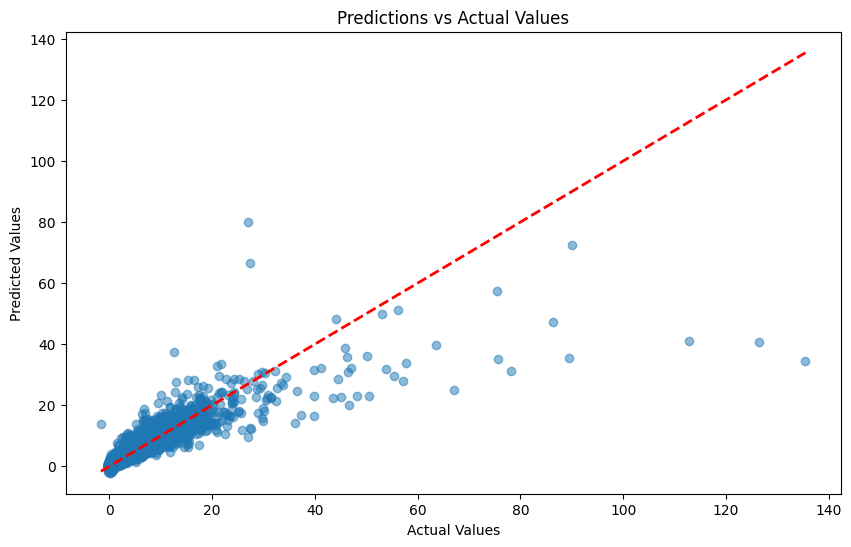

In [68]:
boost_evaluation.predictions_vs_actual_plot()

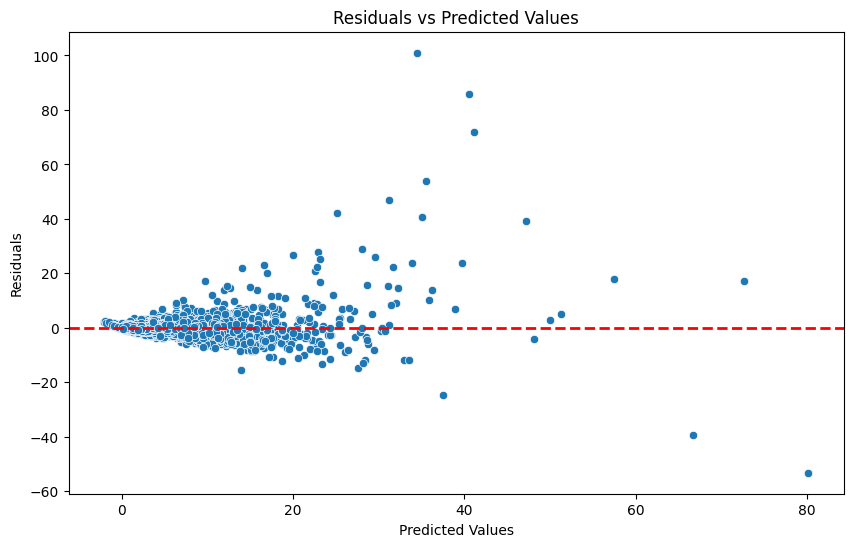

In [69]:
boost_evaluation.residuals_plot()

# Save the model

In [70]:
with open('/content/drive/MyDrive/Churn Prediction/xgboost_regr_profit.pkl', 'wb') as f:
    pickle.dump(boost, f)